## Distribution Plots

In [1]:
# import the python required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

In [3]:
# load the master_dataset.xls
df_master = pd.read_excel('master_dataset.xlsx', sheetname='Sheet1')
print (df_master.head())

   Store                 Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-05-02 00:00:00        42.31       2.572    10382.9    6115.67   
1      1  2010-12-02 00:00:00        38.51       2.548    10382.9    6115.67   
2      1  2010-02-19 00:00:00        39.93       2.514    10382.9    6115.67   
3      1  2010-02-26 00:00:00        46.63       2.561    10382.9    6115.67   
4      1  2010-05-03 00:00:00        46.50       2.625    10382.9    6115.67   

   MarkDown3  MarkDown4  MarkDown5         CPI     ...          Books  \
0     215.07    2406.62    6551.42  211.096358     ...       73315.81   
1     215.07    2406.62    6551.42  211.242170     ...       77280.42   
2     215.07    2406.62    6551.42  211.289143     ...       78602.71   
3     215.07    2406.62    6551.42  211.319643     ...       76091.36   
4     215.07    2406.62    6551.42  211.350143     ...       71718.48   

  Musical_Instruments  Star_Wars  Movies_TV  Video_Games  Portable_Audios  \
0  

In [4]:
# create new column containing the average of the markdown sales
df_master['Ave_MK'] = (df_master['MarkDown1'] + df_master['MarkDown2']+ df_master['MarkDown3']+ df_master['MarkDown4']+ df_master['MarkDown5'])/5

In [5]:
import pandas as pd

def Markdown_Success(c):
    if c['Ave_MK'] <= 4719.567115:
        return 0
    else:
        return 1

In [6]:
df_master['Markdown_Success'] = df_master.apply(Markdown_Success, axis=1)
print (df_master['Markdown_Success'].head()) 

0    1
1    1
2    1
3    1
4    1
Name: Markdown_Success, dtype: int64


 ### Distribution Plots (Size - Unemployment - CPI)
 
* Store Size - There are high concentration on large size and small size stores. This is a bimodal distrubtion of Stores for low sizes (less than 100000) and large sizes (more than 150000)
* Unemployment - The rate of unemployment is normally distributed across the 45 store locations.
* CPI - There is a huge spike in the number of stores located in regions of low consumer price index. This is another bimodal distribution of stores with lower and higher CPI (less than 150 & more than 180)
* The Size and CPI graphs both share a similar distribution.
* Small Size are located in places of lower CPI and vice versa. This impact is more pronounced in Store Type C. If you look back at the correlation matrix for store type C, the high correlation between size and CPI does support this finding.

#### Questions:
* Is there a reason for the high spike in concentration of stores in low CPI regions?
* Could the stores be grouped in a way with these features?
* Is there a correlation between store sizes and CPI?

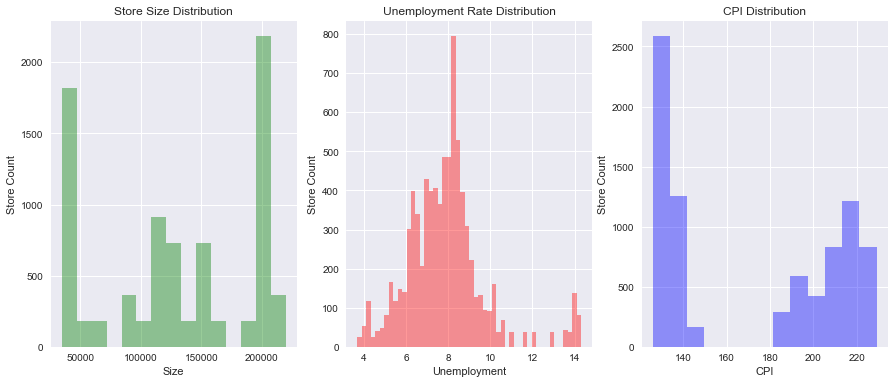

In [7]:
import seaborn as sns
%matplotlib inline
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Store Sizes
sns.distplot(df_master.Size, kde=False, color="g", ax=axes[0]).set_title('Store Size Distribution')
axes[0].set_ylabel('Store Count')

# Graph Unemployment Rate
sns.distplot(df_master.Unemployment, kde=False, color="r", ax=axes[1]).set_title('Unemployment Rate Distribution')
axes[1].set_ylabel('Store Count')

# Graph CPI Distribution
sns.distplot(df_master.CPI, kde=False, color="b", ax=axes[2]).set_title('CPI Distribution')
axes[2].set_ylabel('Store Count')

### Distribution Plots (MarkDowns)

* The distribution of the Markdowns follows negative exponential distribution. This suggests that more stores return the low end of MarkDown. This is more pronounced in MarkDown3 and MarkDown5.
* MarkDown1, MarkDown2 and MarkDown4 have similar distribution. The intercorrelation between MarkDown1 and MarkDown2, and MarkDown1 and MarkDown4 tends to support this finding. 

##### Questions

* Is there a relationship between MarkDown1, MarkDown2 and MarkDown4?
* Does the size of the stores have impact on the MarkDowns?
* How does the unemployment rate affect the Markdowns?
* Does the CPI have any impact on the Markdowns?
* Does the type of Store impact on the Markdowns?
* What is the impact of the holidays on the MarkDown Sales

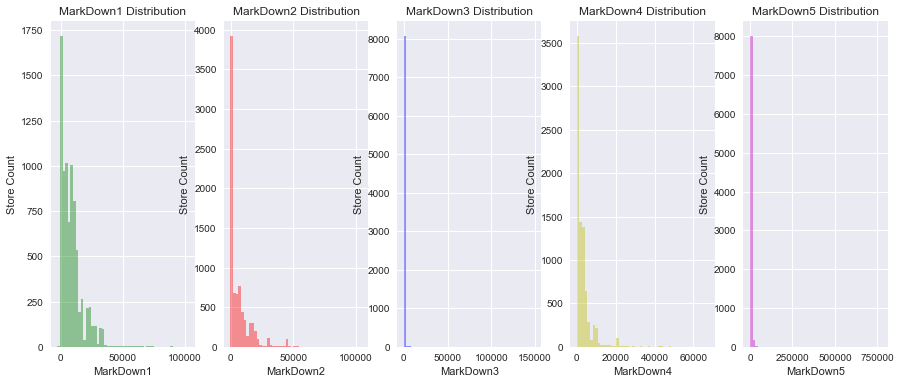

In [8]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=5, figsize=(15, 6))

# Graph MarkDown1
sns.distplot(df_master.MarkDown1, kde=False, color="g", ax=axes[0]).set_title('MarkDown1 Distribution')
axes[0].set_ylabel('Store Count')

# Graph MarkDown2
sns.distplot(df_master.MarkDown2, kde=False, color="r", ax=axes[1]).set_title('MarkDown2 Distribution')
axes[1].set_ylabel('Store Count')

# Graph MarkDown3
sns.distplot(df_master.MarkDown3, kde=False, color="b", ax=axes[2]).set_title('MarkDown3 Distribution')
axes[2].set_ylabel('Store Count')

# Graph MarkDown4
sns.distplot(df_master.MarkDown4, kde=False, color="y", ax=axes[3]).set_title('MarkDown4 Distribution')
axes[3].set_ylabel('Store Count')

# Graph MarkDown5
sns.distplot(df_master.MarkDown5, kde=False, color="m", ax=axes[4]).set_title('MarkDown5 Distribution')
axes[4].set_ylabel('Store Count')

### Fuel Price V.S. MarkDown 

#### Summary:

* There is a biomodal distribution for both level of MarkDown successes.
* When the fuel price is low, promotional events tend to be more successful
* When fuel price is high, the reverse is the case, that is less sales are achieved through the markdowns

C:\Users\Angus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


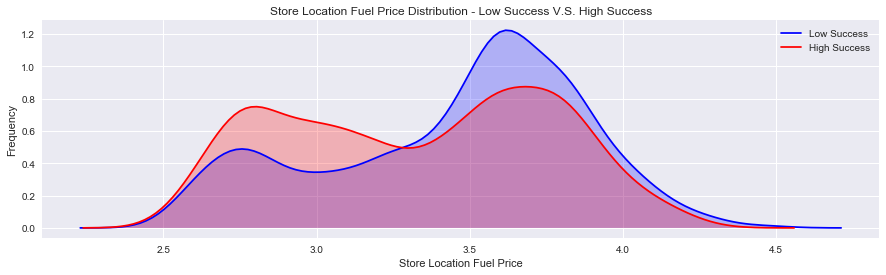

In [9]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df_master.loc[(df_master['Markdown_Success'] == 0),'Fuel_Price'] , color='b',shade=True,label='Low Success')
ax=sns.kdeplot(df_master.loc[(df_master['Markdown_Success'] == 1),'Fuel_Price'] , color='r',shade=True, label='High Success')
ax.set(xlabel='Store Location Fuel Price', ylabel='Frequency')
plt.title('Store Location Fuel Price Distribution - Low Success V.S. High Success')

### Temperature V.S. MarkDown 

#### Summary:

* There is a normal distribution for both level of MarkDown successes.
* The sweet spot temperature that sales are made is between 60F and 70
* The difference in level of success achieved does not seem to be affected by temperature

C:\Users\Angus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


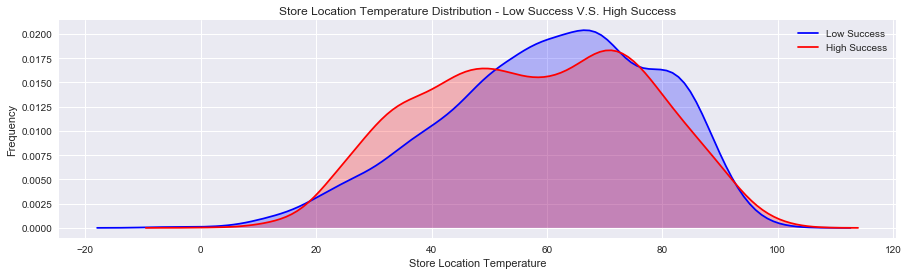

In [10]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df_master.loc[(df_master['Markdown_Success'] == 0),'Temperature'] , color='b',shade=True,label='Low Success')
ax=sns.kdeplot(df_master.loc[(df_master['Markdown_Success'] == 1),'Temperature'] , color='r',shade=True, label='High Success')
ax.set(xlabel='Store Location Temperature', ylabel='Frequency')
plt.title('Store Location Temperature Distribution - Low Success V.S. High Success')

### CPI vs MarkDowns

#### Summary:
* There is a bimodal distribution for both level of MarkDown successes with respect to consumer price index.
* Stores that are located in high CPI areas tend to achieve high success in promotional sales while in areas where the CPI is high, promotional sales are relatively less succesful.

C:\Users\Angus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


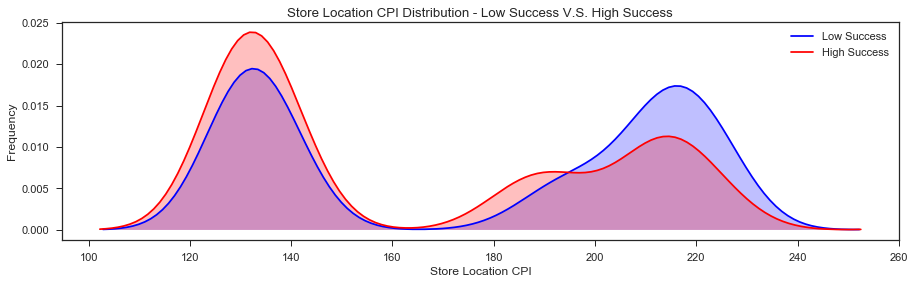

In [21]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df_master.loc[(df_master['Markdown_Success'] == 0),'CPI'] , color='b',shade=True,label='Low Success')
ax=sns.kdeplot(df_master.loc[(df_master['Markdown_Success'] == 1),'CPI'] , color='r',shade=True, label='High Success')
ax.set(xlabel='Store Location CPI', ylabel='Frequency')
plt.title('Store Location CPI Distribution - Low Success V.S. High Success')

### Unemployment vs MarkDowns

#### Summary:
* Low level of MarkDown successes is common in stores located in places with unemployment rate between 6.0% and 10.0%.
* There is a normal distribution of MarkDown Success with a spike at Unemployment rate of ~ 8.0%.

C:\Users\Angus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


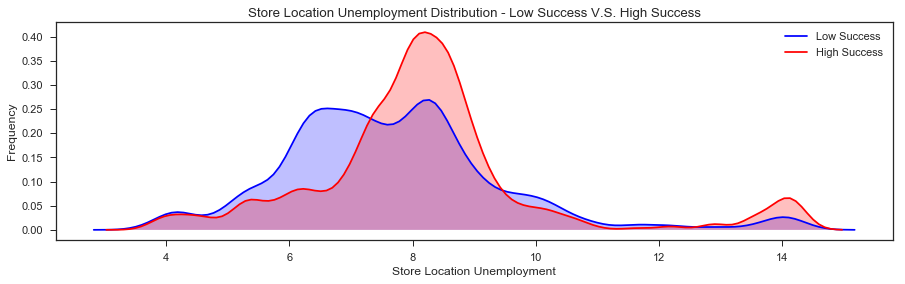

In [22]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df_master.loc[(df_master['Markdown_Success'] == 0),'Unemployment'] , color='b',shade=True,label='Low Success')
ax=sns.kdeplot(df_master.loc[(df_master['Markdown_Success'] == 1),'Unemployment'] , color='r',shade=True, label='High Success')
ax.set(xlabel='Store Location Unemployment', ylabel='Frequency')
plt.title('Store Location Unemployment Distribution - Low Success V.S. High Success')

### Intercorrelation between the MarkDowns

#### Questions:
* Is the impact of a MarkDown felt in another MarkDown?
* Does the result of one MarkDown influence the result of the other?
* Do we investigate the relationship between MarkDown1 and Markdown4 further?

* Moderate Relationship: 
 * Between MarkDown1 and MarkDown2
 * Between Markdown1 and MarkDown3
 * Between Markdown2 and MarkDown4

* Strong Relationship:
 * Between MarkDown 1 and Markdown4


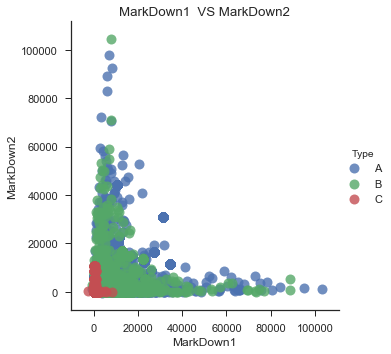

In [11]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('MarkDown1', # Horizontal axis
           'MarkDown2', # Vertical axis
           data=df_master, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Type", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('MarkDown1  VS MarkDown2')

# Set x-axis label
plt.xlabel('MarkDown1')

# Set y-axis label
plt.ylabel('MarkDown2')

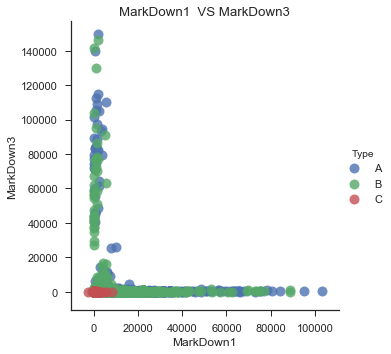

In [12]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('MarkDown1', # Horizontal axis
           'MarkDown3', # Vertical axis
           data=df_master, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Type", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('MarkDown1  VS MarkDown3')

# Set x-axis label
plt.xlabel('MarkDown1')

# Set y-axis label
plt.ylabel('MarkDown3')

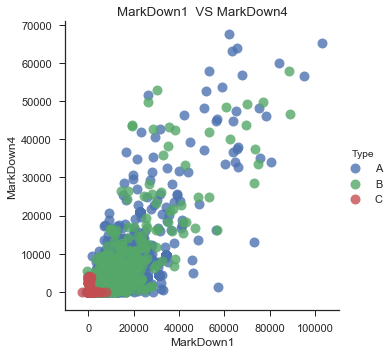

In [13]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('MarkDown1', # Horizontal axis
           'MarkDown4', # Vertical axis
           data=df_master, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Type", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('MarkDown1  VS MarkDown4')

# Set x-axis label
plt.xlabel('MarkDown1')

# Set y-axis label
plt.ylabel('MarkDown4')

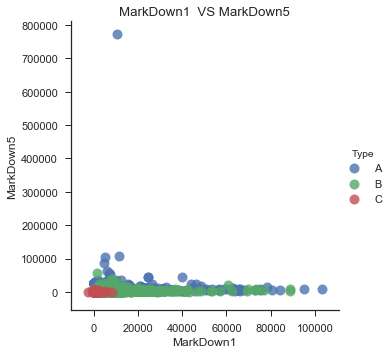

In [14]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('MarkDown1', # Horizontal axis
           'MarkDown5', # Vertical axis
           data=df_master, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Type", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('MarkDown1  VS MarkDown5')

# Set x-axis label
plt.xlabel('MarkDown1')

# Set y-axis label
plt.ylabel('MarkDown5')

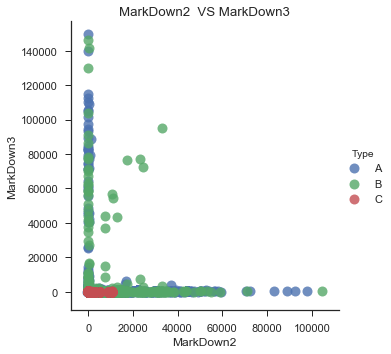

In [15]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('MarkDown2', # Horizontal axis
           'MarkDown3', # Vertical axis
           data=df_master, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Type", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('MarkDown2  VS MarkDown3')

# Set x-axis label
plt.xlabel('MarkDown2')

# Set y-axis label
plt.ylabel('MarkDown3')

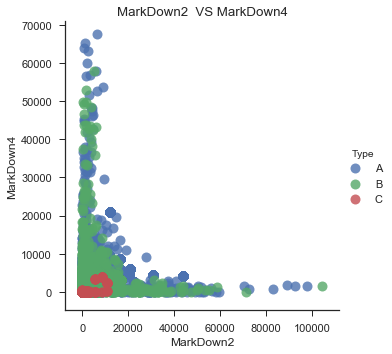

In [16]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('MarkDown2', # Horizontal axis
           'MarkDown4', # Vertical axis
           data=df_master, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Type", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('MarkDown2  VS MarkDown4')

# Set x-axis label
plt.xlabel('MarkDown2')

# Set y-axis label
plt.ylabel('MarkDown4')

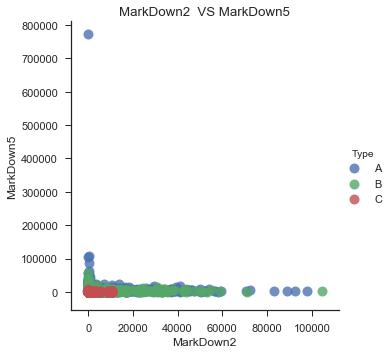

In [17]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('MarkDown2', # Horizontal axis
           'MarkDown5', # Vertical axis
           data=df_master, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Type", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('MarkDown2  VS MarkDown5')

# Set x-axis label
plt.xlabel('MarkDown2')

# Set y-axis label
plt.ylabel('MarkDown5')

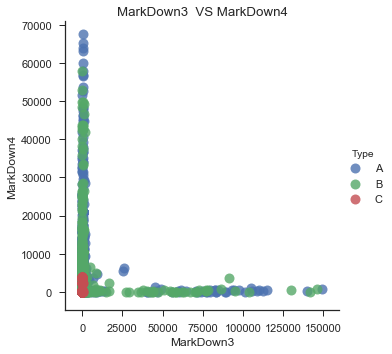

In [18]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('MarkDown3', # Horizontal axis
           'MarkDown4', # Vertical axis
           data=df_master, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Type", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('MarkDown3  VS MarkDown4')

# Set x-axis label
plt.xlabel('MarkDown3')

# Set y-axis label
plt.ylabel('MarkDown4')

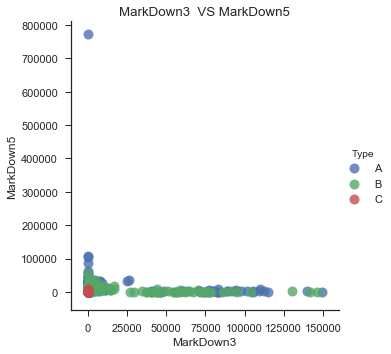

In [19]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('MarkDown3', # Horizontal axis
           'MarkDown5', # Vertical axis
           data=df_master, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Type", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('MarkDown3  VS MarkDown5')

# Set x-axis label
plt.xlabel('MarkDown3')

# Set y-axis label
plt.ylabel('MarkDown5')

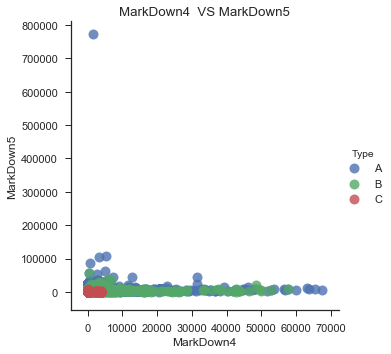

In [20]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('MarkDown4', # Horizontal axis
           'MarkDown5', # Vertical axis
           data=df_master, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Type", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('MarkDown4  VS MarkDown5')

# Set x-axis label
plt.xlabel('MarkDown4')

# Set y-axis label
plt.ylabel('MarkDown5')

### IsHoliday VS MarkDown
#### Summary: 
This shows that when there is no holiday, there is an overlap in performance of both stores within the size 125,000 and 150,000 while during the holidays, the small sized stores have less success than large sized stores. 

#### Questions to think about:

* Why is it that buyers, had on average, interest in spending more during holidays on promotional items in larger sized stores than in smaller sized stores?
* Is it because there are more departments running promotions in larger stoores than in smaller stores? 

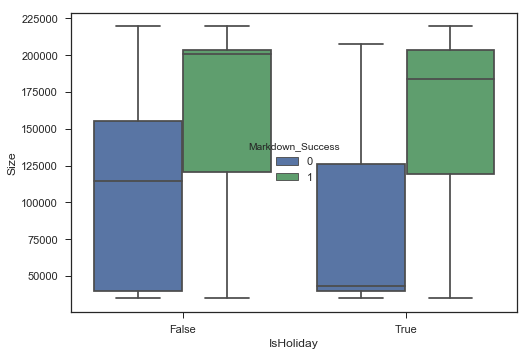

In [31]:
#IsHoliday VS MarkDown
#Looks like stores with size 125,000 and less tends to have less successes with the markdowns 
#During holidays, there is a clear distinction between low and high success in MarkDown
#During holidays, stores of size above 125,000 have high markdown sales success
import seaborn as sns
sns.boxplot(x="IsHoliday", y="Size", hue="Markdown_Success", data=df_master)

### Type VS MarkDown

#### Summary:
* This shows that most of the type A stores are large sizes stores while store C type are predominantly smaller size stores.
* In each of store types A and B, the promotions tended to be less successful in a wide range of sizes. As has been seen in other evaluations, high promotion sales success have been achieved in larger sized stores. 


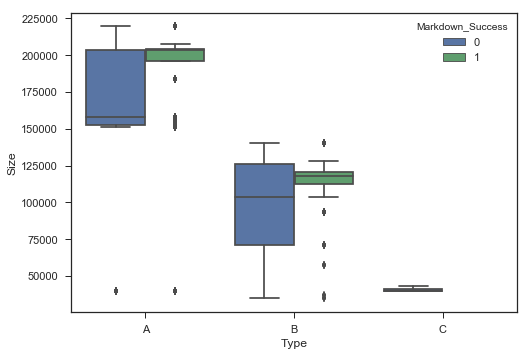

In [32]:
import seaborn as sns
sns.boxplot(x="Type", y="Size", hue="Markdown_Success", data=df_master)